**Scooter Business Research**

GoFast service is the customer of this research. GoFast shared data about some users from several cities, as well as about their trips. It is necessary to analyze data and test hypotheses that can help the business grow

**Research objectives:**
1. Find out the frequency of occurrence of cities
2. Find the ratio of users with a subscription and without a subscription
3. Analyze the age of users
4. Find out the distance the user covered in one trip
5. Find the duration of trips
6. Study in more detail users with and without subscription:
     - Analyze the distance covered by both user groups
     - Analyze the travel duration of both user groups
7. Analyze the revenue of different user groups and test some hypotheses
8. Find distributions related to promotions and push notifications.

**Research progress:**
1. I will receive data from three different tables: ```rides```, ```subscriptions```, ```users```. Nothing is known about the quality of the data, so before you begin to achieve your goals, you need to become familiar with the data.
2. I will check the data for errors and evaluate their impact on the study. At the data preprocessing stage, I will look for opportunities to correct all errors in the data that will not lead to distortion of the final result.
3. Next, I will conduct an exploratory data analysis
4. Then I will combine all the tables into one and conduct targeted research on different user groups and on different issues, therefore the action plan is below.


**Action plan:**
1. Loading and initial study of data
2. Data preprocessing
3. Exploratory data analysis
4. Data merging
5. Revenue calculation
6. Testing four hypotheses
7. Distributions
8. Final conclusion

## **Data and metadata**

### Libraries import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
#each file is assigned to a separate variable
rides = pd.read_csv('C:\\local_path\\rides_go.csv')
plans = pd.read_csv('C:\\local_path\\subscriptions_go.csv')
users = pd.read_csv('C:\\local_path\\users_go.csv')

### Rides dataframe

In [3]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


#### Rides metadata

In [4]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


### Subscriptions dataframe

In [5]:
plans.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


#### Subscriptions metadata

In [6]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


### Users dataframe

In [7]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Kristen Martin,22,Vilnius,ultra
1,2,Jason Leblanc,31,Kaunas,ultra
2,3,Mark Hunter,20,Warsaw,ultra
3,4,Elizabeth Davidson,26,Krakow,ultra
4,5,Kelli Montoya,28,Kaunas,ultra


#### Users metadata

In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


### Notes about dataframes metadata
1. There are no missing values in the tables
2. In the ```rides``` table, one needs to change the data type for the ```date``` field
3. Renaming columns is not required
4. Tables can be joined via ```merge() and join()``` by ```user_id and subscription_type``` fields

### Histograms on dataframes

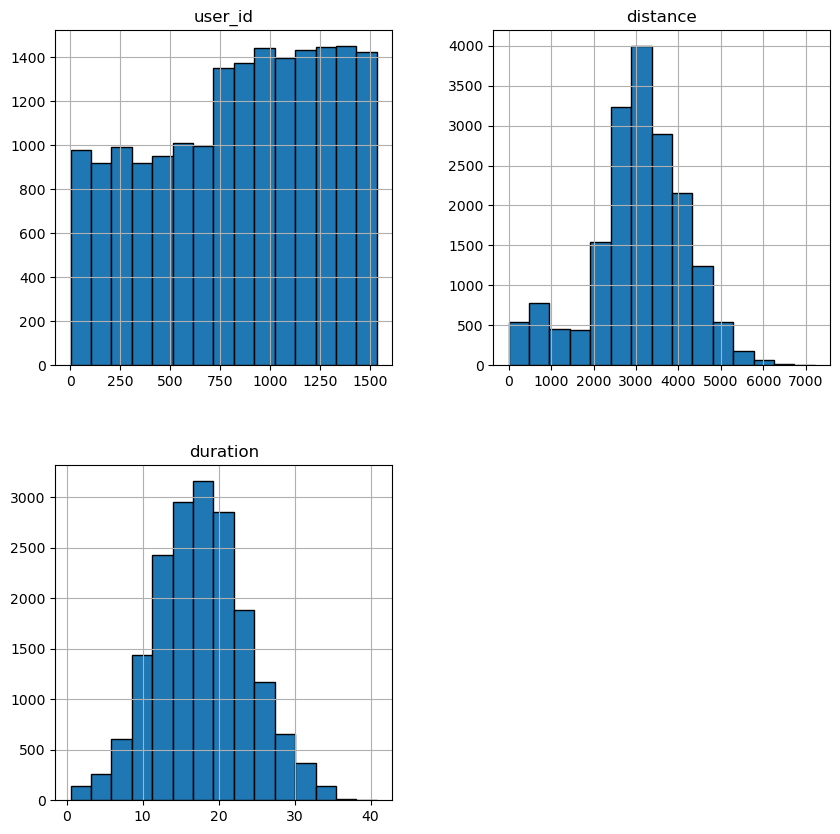

In [9]:
rides.hist(bins=15, figsize=(10, 10), edgecolor='black');

#### About histograms
1. ```Distance``` histogram shows that most often users cover 3 km on scooters and there are 4 thousand such trips.
2. The ````Duration```` bar graph shows that there were 3000 trips of approximately 18 minutes, as well as about 400 trips of approximately 32 minutes.

### **Primary conclusions about tables**

1. Tables do not contain missing values
2. Just one field ```date``` in the table ```rides``` requires changing the data type
3. Histograms allow you to form some primary conclusions that:
     - There are over 3 thousand users whose trips last just under 20 minutes
     - There are no more than a thousand users whose trips last only from 1 to 5 minutes
     - There are 4 thousand users whose travel distance is 4 km
     - There are service lovers, there are only about 150 such users and they travel up to 6.5 kilometers

## **Data preprocessing**

### Data types conversions

```date``` to be converted in ```rides``` dataframe

In [10]:
#'date' convert from object to datetime64[ns]
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%dT%H:%M:%S')

In [11]:
#let's check changes
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [12]:
#quick glance how it looks in the df
rides.head(3)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20


### New column creation with extracted months numbers

In [13]:
#here I find unique year values before modifying the column so that it only has month numbers
pd.DatetimeIndex(rides['date']).year.unique()

Int64Index([2021], dtype='int64', name='date')

In [14]:
#I change the date column in the table so that the month numbers from these dates are displayed
rides['date'] = pd.DatetimeIndex(rides['date']).month

In [15]:
#I'll change the column name from date to month_no to better understand what the column means
rides = rides.rename(columns={'date': 'month_no'})

In [16]:
#and see how the table looks now
rides.head()

,user_id,distance,duration,month_no
0,1,4409.919140,25.599769,1
1,1,2617.592153,15.816871,1
2,1,754.159807,6.232113,4
3,1,2694.783254,18.511000,8
4,1,4028.687306,26.265803,8


### Find and eliminate duplicates

#### Finding obvious explicit in all tables

In [17]:
#number of explicit duplicates in 'rides' table 0
rides.duplicated().sum()

0

In [18]:
#number of explicit duplicates in the 'plans' table 0
plans.duplicated().sum()

0

In [19]:
#number of explicit duplicates in 'users' table 31
users.duplicated().sum()

31

In [20]:
#I will display a list of obvious duplicates in the 'users' table
clear_duplicates = users[users.duplicated()]
clear_duplicates

,user_id,name,age,city,subscription_type
1534,293,Ellen Briggs,26,Dresden,ultra
1535,16,Michelle Potts,27,Dresden,ultra
1536,909,Elizabeth Davidson,20,Frankfurt-am-Main,free
1537,403,Christine Moon,19,Munich,ultra
1538,908,James Vasquez,30,Vilnius,free
1539,43,Kelsey Patterson,22,Kaunas,ultra
1540,127,Melissa Rodriguez,25,Berlin,ultra
1541,659,Devin Medina,27,Krakow,ultra
1542,204,David Spencer,30,Berlin,ultra
1543,153,David Murphy,23,Warsaw,ultra


In [21]:
#I will remove obvious duplicates from the 'users' table and rewrite the indexes
users = users.drop_duplicates().reset_index(drop=True)

In [22]:
#I'll check if there are any duplicates.
users.duplicated().sum()

0

#### Find implicit duplicates in all tables

Regarding implicit duplicates:
1. It is not advisable to look for obvious duplicates in any table. The tables may contain users with the same names, with the same travel distance - all this is normal and does not go out of scope

### Search for anomalies

1. Anomaly plan:
     - ```age``` column in ```users```
     - ```distance``` and ```duration``` columns in ```rides```

#### Box plot ```users``` for age

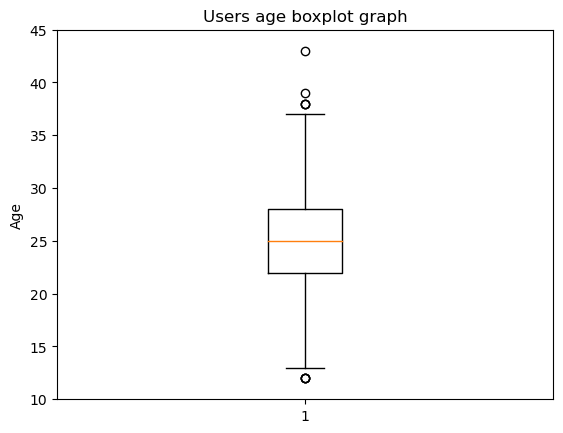

In [23]:
#I assign a Series object to the variable, in which the data from the 'age' column from users
#to see the box plot for this column only
users_age = pd.Series([users['age']])

#I pass a variable with the necessary data to the method
plt.boxplot(users_age)
#adjust the size of the Y axis
plt.ylim(bottom=10, top=45)
#Y axis name
plt.ylabel('Age')
#boxplot's title
plt.title('Users age boxplot graph');

In [24]:
#let's also look at the response to the call to the describe() method on 'age'
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

##### Comments about the diagram

1. Anomalies are traced at the lower and upper boundaries of the data.
2. There are 12 users whose age is less than 14 years old. (found out via query()).
3. There are 5 users whose age is greater than or equal to 38 years. (found out via query()).
4. The average age of users is almost 25 years.
5. The youngest user is 12 years old.
6. There is a user aged 43 years.

#### Box plot ```rides``` for distance

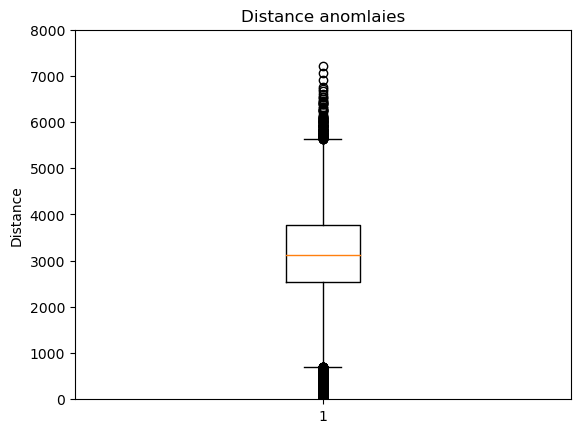

In [25]:
rides_distance = pd.Series([rides['distance']])

#I pass a variable with the necessary data to the method
plt.boxplot(rides_distance)
#adjust the size of the Y axis
plt.ylim(bottom=0, top=8000)
#name for the Y axis
plt.ylabel('Distance')
#title
plt.title('Distance anomlaies');

In [26]:
#let's also look at the response to the call to the describe() method on 'distance'
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

##### Comments about the diagram

1. Anomalies up to 700 meters are traced at the lower boundary and over 5600 at the upper boundary. I will leave data from 700 to 5600 meters
2. Average distance is 3070 meters
3. The median is 3133 meters
4. Minimum 85 meters
5. Maximum 7200 meters

#### Box plot```rides``` for rides duration

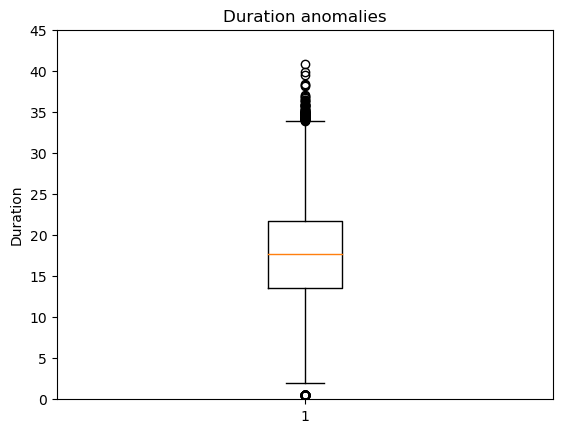

In [27]:
rides_duration = pd.Series([rides['duration']])

#I pass a variable with the necessary data to the method
plt.boxplot(rides_duration)
#adjust the size of the Y axis
plt.ylim(bottom=0, top=45)
#name for the Y axis
plt.ylabel('Duration')
#title
plt.title('Duration anomalies');

In [28]:
#describe() for 'duration'
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

##### Comments about the diagram

1. Anomalies of up to 2 minutes at the lower boundary and over 36 at the upper boundary are traced.
2. Average duration is almost 18 minutes
3. Median is 17 minutes
4. Minimum 50 seconds
5. Maximum almost 41 minutes

### **Conclusions after data preprocessing**

1. The ```date``` column from the ```rides``` table was converted to datetime64[ns] data type for ease of use
2. A new column ```month_number``` was created, which contains the month number taken from the values of the ```date`` column
3. 31 obvious duplicates in the ```users``` column have been eliminated, there are no duplicates in the remaining columns
4. Anomalies from:
     - ```age``` columns in the ```users``` table
     - columns ```distance``` and ```duration``` in the ```rides``` table

## **Exploratory data analysis**

### Study the frequency of occurrence of cities

In [29]:
#city frequency table
users['city'].value_counts()

Berlin               219
Frankfurt-am-Main    204
Krakow               198
Dresden              193
Munich               189
Kaunas               183
Vilnius              180
Warsaw               168
Name: city, dtype: int64

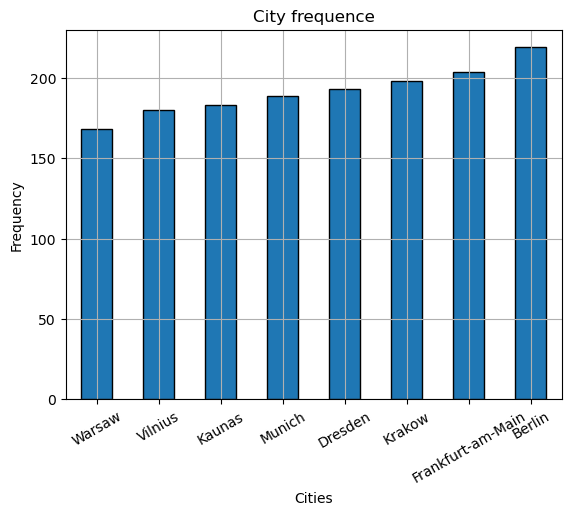

In [30]:
#using the sorted table obtained using value_counts() I build a vertical bar chart
city_frequency = (users['city'].value_counts()
                  .sort_values(ascending=True)
                  .plot(kind='bar', edgecolor='black', linewidth=1, 
                        title='City frequence', ylabel='Frequency', xlabel='Cities', grid=True))
plt.xticks(rotation=30);

#### Comments on the histogram

1. The horizontal axis (X) represents cities, the vertical axis (Y) represents the frequency of occurrence of a particular city in this column
2. It may be noted:
     - Users most actively use scooters in Berlin - 219 mentions
     - Moderate use of scooters can be observed in Dresden - 193 mentions
     - Lowest activity in using scooters in Warsaw - 168 mentions

### Study of the ratio of users with a subscription and without one

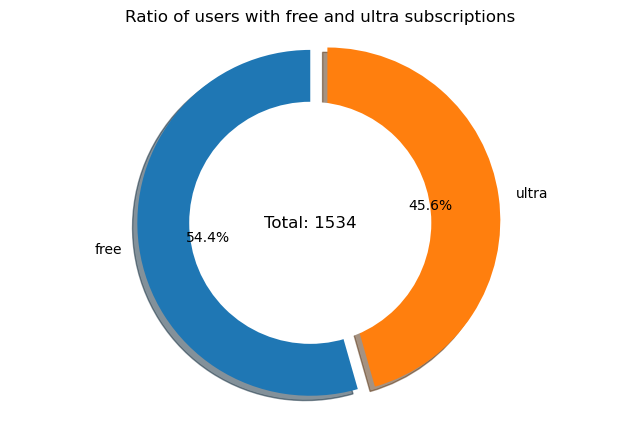

In [31]:
#categorical variables. I think it’s a good decision to make a Pie Chart. The ratio is shown both visually and by data

#variable with data on the type of subscription and the number of users with a particular subscription
subscription_counts = users['subscription_type'].value_counts()

#creating a share chart
fig, ax = plt.subplots(figsize=(8, 5))

#creating a visual effect of separation
explode=(0, 0.1)

#here a share chart with absolute values is created
ax.pie(subscription_counts,
        labels=subscription_counts.index,
        autopct='%1.1f%%', startangle=90,
        explode=explode, shadow=True)

#adding a pie chart to the center to show absolute values
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
#let's make space inside
fig.gca().add_artist(centre_circle)

#display the total number of users in the center
total_users = len(users)
plt.text(0, 0, f'Total: {total_users}', ha='center', va='center', fontsize=12)

#display a circle instead of an ellipse
ax.axis('equal')

#name of share chart
plt.title('Ratio of users with free and ultra subscriptions');

#### Comments on the pie chart

1. The pie chart shows that there are 1534 total users and:
     - Of these, 45.6% are with Ultra subscription - 699 users
     - While 54.4% are unsubscribed - 835 users

### Users age study

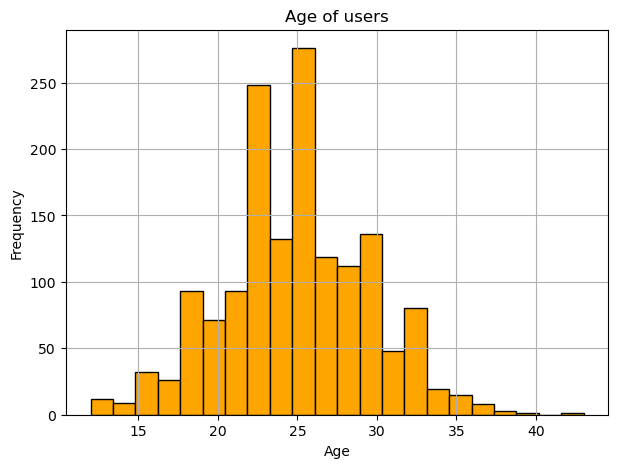

In [32]:
#building a histogram by age
#I make the edging of the bins and adjust their width too
users['age'].hist(bins=22, figsize=(7, 5), edgecolor='black', linewidth=1, color='orange')
#set the name of the Y axis
plt.ylabel('Frequency')
#set the name of the X axis
plt.xlabel('Age')
#set the name of the histogram itself
plt.title('Age of users');

In [33]:
#statistics for age
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

#### Comments on the histogram
1. The horizontal axis (X) represents the age of users, the vertical axis (Y) represents the frequency of occurrence of user ages
2. Worth noting:
     - Scooters are most popular among 25-year-old users - such users have taken a scooter over 140 times
     - Scooters are not much inferior in popularity among 20-24 year old users - in this age range, users also actively take scooters from 70 to 130 times
     - A sharp decline in the use of scooters has been observed since 29 years. If 28-year-old users took scooters 112 times, but 29-year-olds already 69 times - an almost 2-fold decline
3. We can conclude:
     - The most active group of users aged 21 to 28
     - The least active group of users, ranging from 33 years and older
     - Demand for scooters begins among users from 12-13 years old
4. Data from descriptive statistics:
     - The average age of users is almost 25 years
     - The youngest user is 12 years old
     - The oldest is 43 years old

### One ride distance study

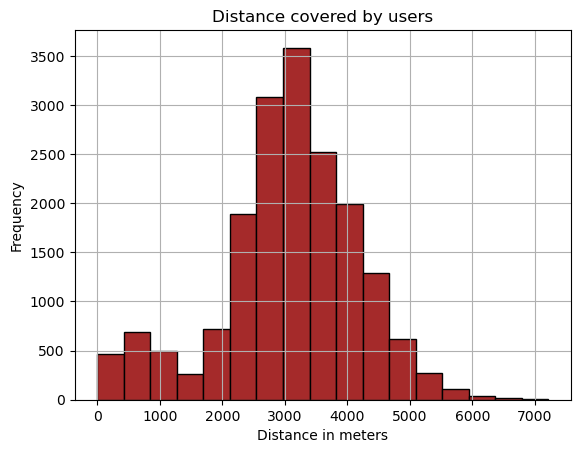

In [34]:
#building a histogram based on distances
#I make the edging of the bins and adjust their width too
rides['distance'].hist(bins=17, edgecolor='black', linewidth=1, color='brown')
#set the name of the Y axis
plt.ylabel('Frequency')
#set the name of the X axis
plt.xlabel('Distance in meters')
#set the name of the histogram itself
plt.title('Distance covered by users');

#### Comments on the histogram
1. The horizontal axis (X) represents distances, the vertical (Y) axis represents the frequency of occurrence of distances
2. There are 2 distances that users cover most often:
     - Almost 4 thousand users cover a distance of 3 km
     - Approximately 3200 users cover a distance of 3600 meters
3. It is worth highlighting:
     - There are approximately 700 users who cover a distance of ~650 meters
     - There are approximately 300 users who cover distances over 5km

### Rides duration resarch

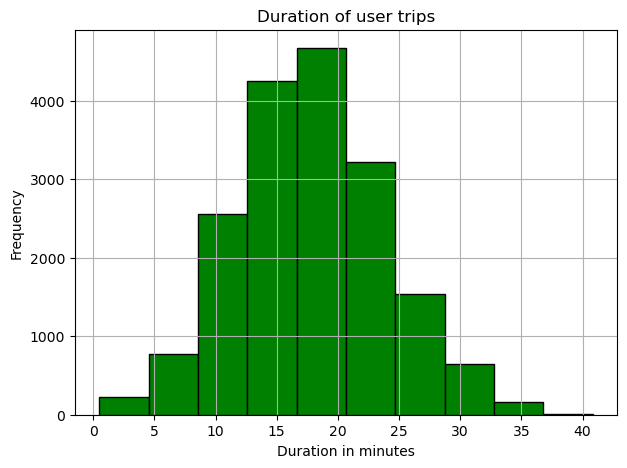

In [35]:
#building a histogram of trip duration
#I make the edging of the bins and adjust their width too
rides['duration'].hist(figsize=(7, 5), edgecolor='black', linewidth=1, color='green')
#set the name of the Y axis
plt.ylabel('Frequency')
#set the name of the X axis
plt.xlabel('Duration in minutes')
#set the name of the histogram itself
plt.title('Duration of user trips');

#### Comments on the histogram
1. The horizontal axis (X) represents the duration of trips, the vertical axis (Y) represents the frequency of occurrence of certain durations.
2. There are 3 durations that occur most often:
     - There were approximately 3,700 trips with a duration of approximately 18 minutes
     - There were about 3400 trips with a duration of approximately 15 minutes
     - 3200 trips were made with a duration of 21 minutes
3. Worth noting:
     - There are about 200 trips with a duration of 5 minutes
     - There are also about 200 trips with a duration of 33 minutes

### **Conclusions after research**

1. Research on the frequency of scooter use in different cities:
     - Users most actively use scooters in Berlin - 219 mentions
     - Lowest activity in using scooters in Warsaw - 168 mentions
2. Ratio of users with and without subscription:
     - Total users 1517
     - Of these, 699 users are with the ```ultra``` subscription, which is 45.6% of all users
     - Of these, 835 users are without a ``free`` subscription, which is 54.4% of all users
3. Study of the popularity of scooters among users of different ages:
     - Scooters are most popular among 25-year-old users - such users have taken a scooter over 140 times
     - A sharp decline in the use of scooters has been observed since 29 years. If 28-year-old users took scooters 112 times, but 29-year-olds already 69 times - an almost 2-fold decline
4. Study of the distance covered:
     - Almost 4 thousand users cover a distance of 3 km
     - Approximately 3200 users cover a distance of 3600 meters
     - There are approximately 700 users who cover a distance of ~650 meters
     - There are approximately 300 users who cover distances over 5km
5. Trip duration research:
     - There were approximately 3,700 trips with a duration of approximately 18 minutes
     - There were about 3400 trips with a duration of approximately 15 minutes
     - There are about 200 trips with a duration of 5 minutes and about 200 trips with a duration of 33 minutes

## **Data merging**

### Combining user, trip and subscription data

In [36]:
#I assign the merge of three tables to the dfs variable. I combine trips and users by user_id
#and then I merge the plans using the subscription_type table from two tables of trips and users
dfs = pd.merge(pd.merge(rides, users, on='user_id'), plans, on='subscription_type')
dfs.head()

,user_id,distance,duration,month_no,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,1,Kristen Martin,22,Vilnius,ultra,6,0,199
1,1,2617.592153,15.816871,1,Kristen Martin,22,Vilnius,ultra,6,0,199
2,1,754.159807,6.232113,4,Kristen Martin,22,Vilnius,ultra,6,0,199
3,1,2694.783254,18.511000,8,Kristen Martin,22,Vilnius,ultra,6,0,199
4,1,4028.687306,26.265803,8,Kristen Martin,22,Vilnius,ultra,6,0,199


### Creating dataframes of users with and without subscriptions

#### Dataframe about users without subscription

In [37]:
#I assign a slice of data about users without a subscription from dfs to the variable no_plan_users
no_plan_users = dfs.query('subscription_type == "free"')
no_plan_users.tail()

,user_id,distance,duration,month_no,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
18063,1534,3781.098080,19.822962,11,Joy Roberts,25,Dresden,free,8,50,0
18064,1534,2840.423057,21.409799,11,Joy Roberts,25,Dresden,free,8,50,0
18065,1534,3826.185507,18.435051,11,Joy Roberts,25,Dresden,free,8,50,0
18066,1534,2902.308661,16.674362,11,Joy Roberts,25,Dresden,free,8,50,0
18067,1534,2371.711192,15.893917,12,Joy Roberts,25,Dresden,free,8,50,0


#### Dataframe about users with subscriptions

In [38]:
#I assign a slice of data about users with a subscription from dfs to the users_with_plans variable
users_with_plans = dfs.query('subscription_type == "ultra"')
users_with_plans.head()

,user_id,distance,duration,month_no,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,1,Kristen Martin,22,Vilnius,ultra,6,0,199
1,1,2617.592153,15.816871,1,Kristen Martin,22,Vilnius,ultra,6,0,199
2,1,754.159807,6.232113,4,Kristen Martin,22,Vilnius,ultra,6,0,199
3,1,2694.783254,18.511000,8,Kristen Martin,22,Vilnius,ultra,6,0,199
4,1,4028.687306,26.265803,8,Kristen Martin,22,Vilnius,ultra,6,0,199


### Visualization of distances and time

#### Travel distances for users without a subscription

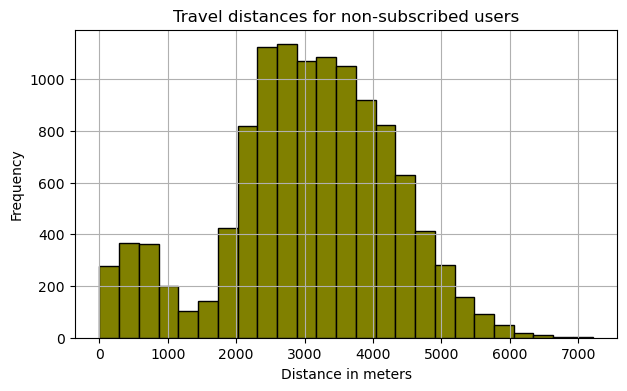

In [39]:
#I'm building a histogram based on the 'distance' column from the table where I collected users without a subscription
#I make the edging of the bins and adjust their width too
no_plan_users['distance'].hist(bins=25, figsize=(7, 4), edgecolor='black', linewidth=1, color='olive')
#Y axis name
plt.ylabel('Frequency')
#X axis name
plt.xlabel('Distance in meters')
#histogram name
plt.title('Travel distances for non-subscribed users');

##### Comments about the histogram

1. The horizontal axis (X) represents distances, the vertical axis (Y) represents the frequency of occurrence of distances covered by users without a subscription
2. There are several distance leaders in terms of frequency of occurrence:
     - About 800 trips over a distance of 2.5 km
     - About 730 trips over a distance of 3.5 km
3. Another thing worth noting:
     - There are approximately 200 trips, the distance of which is 0.5 km
     - There are 350 trips, the distance of which is over 5 km

#### Duration of trips for users without a subscription

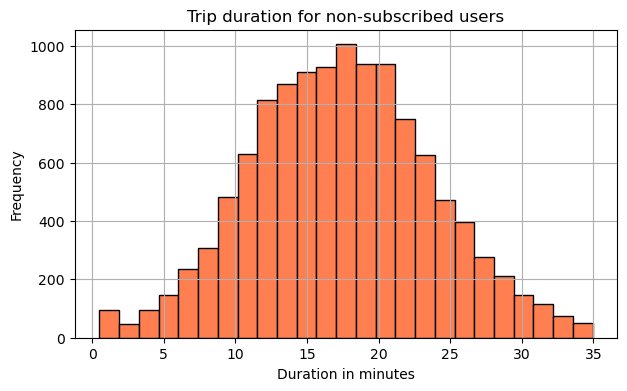

In [40]:
#I'm building a histogram based on the 'duration' column from the table where I collected users without a subscription
#I make the edging of the bins and adjust their width too
no_plan_users['duration'].hist(bins=25, figsize=(7, 4), edgecolor='black', linewidth=1, color='coral')
#Y axis name
plt.ylabel('Frequency')
#X axis name
plt.xlabel('Duration in minutes')
#histogram name
plt.title('Trip duration for non-subscribed users');

##### Comments about the histogram

1. The horizontal axis (X) represents the duration of trips, the vertical axis (Y) represents the frequency of occurrence of certain durations.
2. There are several durations that occur most often:
     - There were approximately 850 trips with a duration of approximately 17 minutes
     - About 810 trips with a duration of 21 minutes
3. Worth noting:
     - There are about 30 trips with a duration of 5 minutes
     - And there are 100 trips with a duration of 30 minutes

#### Travel distances of users with a subscription

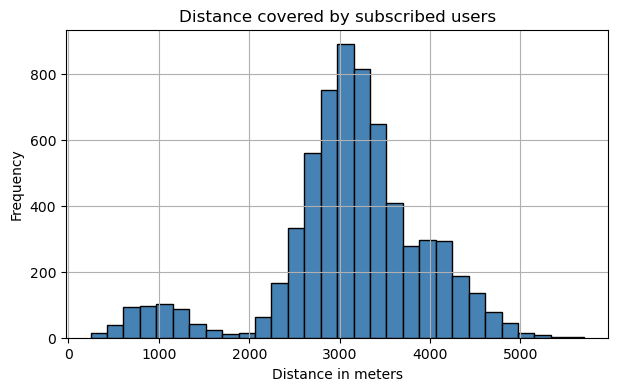

In [41]:
#I'm building a histogram based on the 'distance' column from the table where I collected users without a subscription
#I make the edging of the bins and adjust their width too
users_with_plans['distance'].hist(bins=30, figsize=(7, 4), edgecolor='black', linewidth=1, color='steelblue')
#Y axis name
plt.ylabel('Frequency')
#X axis name
plt.xlabel('Distance in meters')
#histogram name
plt.title('Distance covered by subscribed users');

##### Comments about the histogram

1. The horizontal axis (X) represents the distance, the vertical (Y) axis represents the frequency of occurrence of distances
2. There are several distance leaders in terms of frequency of occurrence:
     - About 750 trips with a distance of 3100 meters
     - About 460 trips with a distance of 2.5 km
3. Another thing worth noting:
     - There are approximately 100 trips, the distance of which is 0.5 km
     - There are 20 trips, the distance of which is over 5 km

#### Duration of trips for users with a subscription

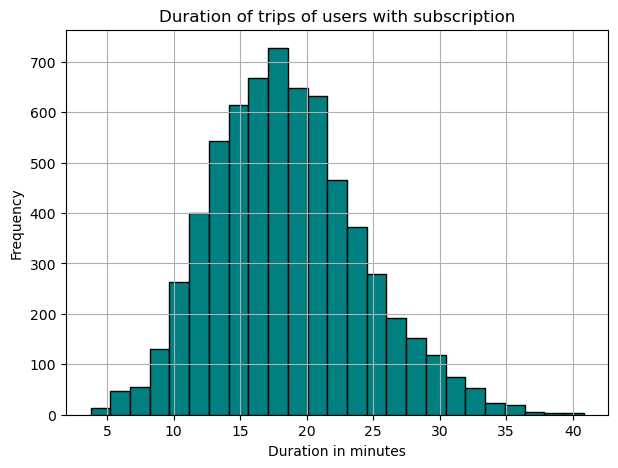

In [42]:
#I'm building a histogram based on the 'duration' column from the table where I collected users without a subscription
#I make the edging of the bins and adjust their width too
users_with_plans['duration'].hist(bins=25, figsize=(7, 5), edgecolor='black', linewidth=1, color='teal')
#Y axis name
plt.ylabel('Frequency')
#X axis name
plt.xlabel('Duration in minutes')
#histogram name
plt.title('Duration of trips of users with subscription');

##### Comments about the histogram

1. The horizontal axis (X) represents the duration of trips, the vertical axis (Y) represents the frequency of occurrence of certain durations.
2. There are several leaders in terms of duration:
     - Almost 600 trips with a duration of 17 minutes
     - 540 trips with a duration of 18 minutes
3. It is worth highlighting:
     - About 20 trips have a trip duration of 5 minutes and the same number of trips have a duration of 35 minutes

### Historams overlapping for duration comparison

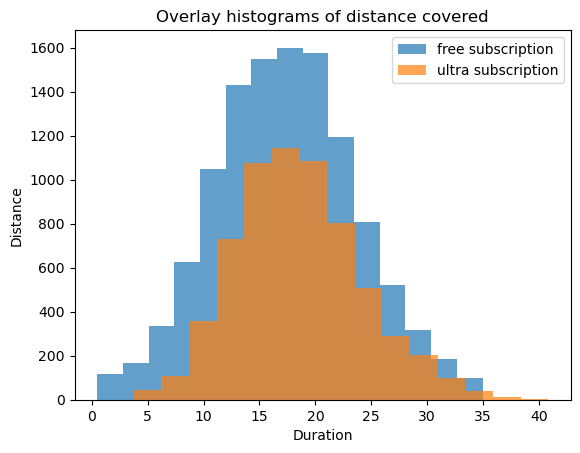

In [43]:
#histogram for duration of trips of users without subscription
plt.hist(no_plan_users['duration'],
          label='free subscription',
          alpha=0.7, bins=15)

#histogram for duration of trips of users with subscription
plt.hist(users_with_plans['duration'],
          label='ultra subscription',
          alpha=0.7, bins=15)

#place for a legend
plt.legend(loc='upper right')
#histogram name
plt.title('Overlay histograms of distance covered')
#Y axis name
plt.ylabel('Distance')
#X axis name
plt.xlabel('Duration');

### Historams overlapping for distance comparison

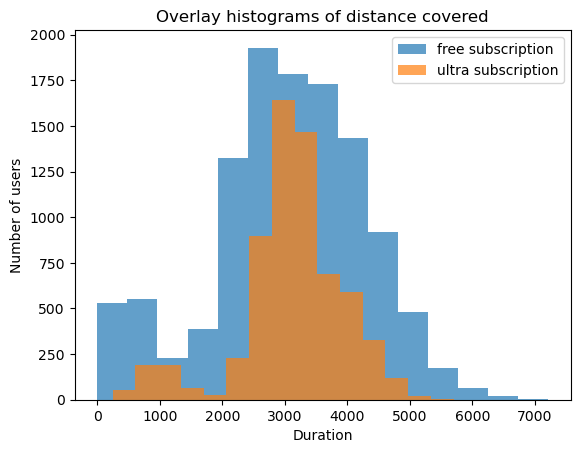

In [44]:
#histogram for duration of trips of users without subscription
plt.hist(no_plan_users['distance'],
          label='free subscription',
          alpha=0.7, bins=15)

#histogram for duration of trips of users with subscription
plt.hist(users_with_plans['distance'],
          label='ultra subscription',
          alpha=0.7, bins=15)

#place for a legend
plt.legend(loc='upper right')
#histogram name
plt.title('Overlay histograms of distance covered')
#Y axis name
plt.ylabel('Number of users')
#X axis name
plt.xlabel('Duration');

### **Conclusions after joins and visualizations**

1. Three tables were combined into one ```dfs``` for subsequent detailed study of the data
2. Tables were created by slicing:
     - ```no_plan_users``` with users without subscription from the ```dfs``` table
     - ```users_with_plans``` with users with a subscription from the ```dfs``` table
3. The issue of travel distance and travel time of users without a subscription was investigated:
     - About 800 trips over a distance of 2.5 km
     - About 810 trips with a duration of 21 minutes
     - There are 350 trips, the distance of which is over 5 km
     - There are 100 trips with a duration of 30 minutes
4. The issue of travel distance and travel time of users with a subscription was investigated:
     - About 750 trips with a distance of 3100 meters
     - Almost 600 trips with a duration of 17 minutes
     - There are approximately 100 trips, the distance of which is 0.5 km
     - About 20 trips have a trip duration of 5 minutes and the same number of trips have a duration of 35 minutes

## **Revenue calculation**

### Creating a dataframe with aggregated data

In [45]:
#rounding the duration in the original merged dataframe
dfs['duration'] = np.ceil(dfs['duration'])

#I'll check how the rounding turned out
dfs['duration'].head()

0    26.0
1    16.0
2     7.0
3    19.0
4    27.0
Name: duration, dtype: float64

In [46]:
#pivot table
result_pivot = pd.pivot_table(dfs,
                              index=['user_id', 'month_no'], #grouping by ID and month number
                              values=['distance', 'duration'], #columns for applying functions
                              aggfunc={'distance': 'sum', 'duration': 'sum'}) #applying functions to columns

#column with the number of trips in each month for each user
result_pivot['trips_count'] = dfs.groupby(['user_id', 'month_no']).size().values

#dataframe output
result_pivot

distance  duration  trips_count
user_id month_no                                     
1       1          7027.511294      42.0            2
        4           754.159807       7.0            1
        8          6723.470560      46.0            2
        10         5809.911100      32.0            2
        11         7003.499363      56.0            3
...                        ...       ...          ...
1534    6          3409.468534      26.0            2
        8          7622.453034      48.0            2
        9          4928.173852      23.0            1
        11        13350.015305      78.0            4
        12         2371.711192      16.0            1

[11331 rows x 3 columns]

### Adding a column with monthly revenue

In [47]:
#merge the pivot table, users table by user_id
result_pivot = pd.merge(result_pivot, users, on='user_id', how='left')

#checked the result of the merge below, then deleted the self-test

In [48]:
#to the aggregated table I will combine plans by subscription_type
result_pivot = pd.merge(result_pivot, plans, on='subscription_type', how='left')

#checked the result of the merge below, then deleted the self-test

In [49]:
#here I calculate revenue using the formula below
result_pivot['revenue'] = (
     (result_pivot['start_ride_price'] * result_pivot['trips_count']) +
     (result_pivot['minute_price'] * result_pivot['duration']) +
     result_pivot['subscription_fee']
)

#let's see what happened
result_pivot.head(3)

,user_id,distance,duration,trips_count,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,revenue
0,1,7027.511294,42.0,2,Kristen Martin,22,Vilnius,ultra,6,0,199,451.0
1,1,754.159807,7.0,1,Kristen Martin,22,Vilnius,ultra,6,0,199,241.0
2,1,6723.470560,46.0,2,Kristen Martin,22,Vilnius,ultra,6,0,199,475.0


In [50]:
#and here I’ll make a pivot table, group it by user, sort by revenue DESC. curious to see
aggregated = result_pivot.groupby(['user_id']).agg({
     'revenue': 'sum'}).sort_values(by='revenue', ascending=False).reset_index() #reset multi-indexes here

aggregated.head()

,user_id,revenue
0,1236,5022.0
1,1063,4924.0
2,584,4908.0
3,783,4892.0
4,1204,4752.0


### **Conclusions after calculating revenue**

1. A table ```aggregated``` was created with aggregated data, where the data is grouped by users and months, the number of trips of each user in each month was also calculated there
2. The ```revenue``` column was added to the ```aggregated``` table, in which the profit from each user was calculated
3. The top 5 users who brought in the most revenue were found. Some revenue data:
     - 2514, 2309, 2303, 2303, 2297

## **Hypothesis testing**

### Study of the travel duration of users without and with a subscription

#### Defining hypotheses

1. Null hypothesis (H0): The average travel time for users with a subscription is equal to the average travel time for users without a subscription.
2. Alternative hypothesis (H1): The average travel time for users with a subscription is greater than the average travel time for users without a subscription.

In [51]:
#duration of trips of users with subscription
subs = users_with_plans['duration']
#duration of trips for users without subscription
no_subs = no_plan_users['duration']

#I set the level of stat significance
alpha = 0.05

#One-sided T-test
results = st.ttest_ind(subs, no_subs, alternative='greater')

print(f'p-value is:', results.pvalue)

#Compare the resulting p-value with the significance level alpha
if results.pvalue < alpha:
     print("Reject the null hypothesis in favor of the alternative: The average travel time for users with a subscription is greater than the average travel time for users without a subscription.")
else:
     print("The average travel time for users with a subscription is equal to the average travel time for users without a subscription.")

p-value is: 1.2804098316645618e-34
Reject the null hypothesis in favor of the alternative: The average travel time for users with a subscription is greater than the average travel time for users without a subscription.


### Exploring the hypothesis of the optimal distance per trip without a subscription

#### Defining hypotheses
1. Null hypothesis (H0): The average distance per trip for users with a subscription **is** 3130 meters
2. Alternative hypothesis (H1): The average distance per trip for users with a subscription is **more** 3130 meters

In [52]:
#average travel distance of a user with a subscription
distances = users_with_plans['distance']

#I set the level of stat significance
alpha = 0.05

#One-sided T-test
results = st.ttest_1samp(distances, 3130, alternative='greater')

#conclusion
print("p-value is:", results.pvalue)

#Compare the resulting p-value with the significance level alpha
if results.pvalue < alpha:
     print("We reject the null hypothesis in favor of the alternative: the average distance of one trip for users with a subscription exceeds 3130 meters.")
else:
     print("There is not enough evidence to reject the null hypothesis: the average distance per trip for users with a subscription does not exceed 3130 meters.")

p-value is: 0.9195368847849785
There is not enough evidence to reject the null hypothesis: the average distance per trip for users with a subscription does not exceed 3130 meters.


### Research from which user group generates more revenue

#### Defining hypotheses
1. Null hypothesis (H0): The average monthly revenue from users with a subscription is **not different** from the average monthly revenue from users without a subscription.
2. Alternative Hypothesis (H1): The average monthly revenue from users with a subscription is **higher** than the average monthly revenue from users without a subscription.

In [53]:
#revenue from users with subscription
revenue_with_subscription = result_pivot[result_pivot['subscription_type'] == 'ultra']['revenue']
#revenue from users without subscription
revenue_without_subscription = result_pivot[result_pivot['subscription_type'] == 'free']['revenue']

#stat significance
alpha = 0.05

#one-sided T-Test
results = st.ttest_ind(revenue_with_subscription, revenue_without_subscription, alternative='greater')

#conclusion
print("p-value:", results.pvalue)

# Compare the resulting p-value with the significance level alpha
if results.pvalue < alpha:
     print("We reject the null hypothesis in favor of the alternative: the average monthly revenue from users with a subscription is higher than from users without a subscription.")
else:
     print("There is not enough evidence to reject the null hypothesis: Average monthly revenue from users with a subscription is no different from revenue from users without a subscription.")

p-value: 1.8850394384715216e-31
We reject the null hypothesis in favor of the alternative: the average monthly revenue from users with a subscription is higher than from users without a subscription.


### **Conclusion after hypotheses**

1. Duration of trips for user groups with **free** subscription and with **ultra** subscription
     - The average travel time for users with a subscription is greater than the average travel time for users without a subscription.
     - p-value is 1.2804098316645618e-34, so the null hypothesis is rejected
2. Optimal distance per trip without subscription
     - Null hypothesis: The average distance per trip for users with a subscription is 3130 meters
     - p-value is 0.9195368847849785, so the null hypothesis cannot be rejected here
3. The question of which user group brings in more revenue
     - Average monthly revenue from users with a subscription is higher than from users without a subscription.
4. The task of reducing requests for technical support
     - Two-way T-Test must be used with the ttest_ind method of the scipy library from the stats module

## **Final output**
**Initial goal** - GoFast service is the customer of this research. GoFast shared data about some users from several cities, as well as about their trips. To do this, it is necessary to analyze data and test hypotheses that can help the business grow

**To achieve the goal**
1. First stage:
     - Familiarization with the data
     - Preliminary construction of histograms
     - Drawing up primary conclusions
2. Second stage:
     - Data type conversion
     - Creating a new column with the month number
     - Search and eliminate duplicates
     - Range diagrams for:
         - Age
         - Distance covered
         - Duration of trips
     - Search for anomalies in different columns
3. Exploratory data analysis:
     - Various studies have been carried out:
         - Frequency of occurrence of cities - most often Berlin 219 mentions, Dresden occurs 193 times
         - Research on the age of users - The greatest popularity of scooters among 25-year-old users
         - The ratio of users with **free** and **ultra** subscriptions is 54.4% and 45.6% of users, respectively (699 users to 835)
4. The data from all tables was combined into one for subsequent analysis and visualization of some problems:
     - The issue of travel distance and travel time of users without a subscription was investigated:
         - About 800 trips over a distance of 2.5 km
         - About 810 trips with a duration of 21 minutes
         - There are 350 trips, the distance of which is over 5 km
         - There are 100 trips with a duration of 30 minutes
     - The issue of travel distance and travel time of users with a subscription was investigated:
         - About 750 trips with a distance of 3100 meters
         - Almost 600 trips with a duration of 17 minutes
         - There are approximately 100 trips, the distance of which is 0.5 km
         - About 20 trips have a trip duration of 5 minutes and the same number of trips have a duration of 35 minutes
5. Revenue was calculated:
     - The top 5 users who brought in the most revenue were found. Some revenue data:
     - 5022, 4924, 4908, 4892, 4752
6. Various hypotheses were tested:
     - Duration of trips for different user groups
         - Found: The average travel time for users with a subscription is longer than the average travel time for users without a subscription.
     - Average monthly revenue of users with and without subscription
         - Found: Average monthly revenue from users with a subscription is higher than from users without a subscription.